In [1]:
using PyPlot

Aufgabe 3a)

In [2]:
function rand_hist(m, n, f=rand)
    result = zeros(m)
    for i in 1:n
        result[Int(ceil(m*f()))] += 1
    end
    return result
end

rand_hist (generic function with 2 methods)

In [3]:
function plot_hist(m, n, hist)
    # Hässlich aber ¯\_(*-*)_/¯
    ys = [0]
    for x in hist
        push!(ys,0) # senkrechte vor dem Balken
        for i in 1:98
            push!(ys, x) # 98 mal der Wert als Oberseite des Balkens
        end
        push!(ys, 0) # senkrechte zum abschluss eines Balkens
    end
    
    plot(1:(1/100):(m+1),ys)
    axis([1,m,0,(n/m)*2]) # y Achse soll bei 0 Anfangen sonst sieht man die Gleichverteilung nicht
    xlabel("Wertebereich")
    ylabel("Anzahl der Treffer")
end

plot_hist (generic function with 1 method)

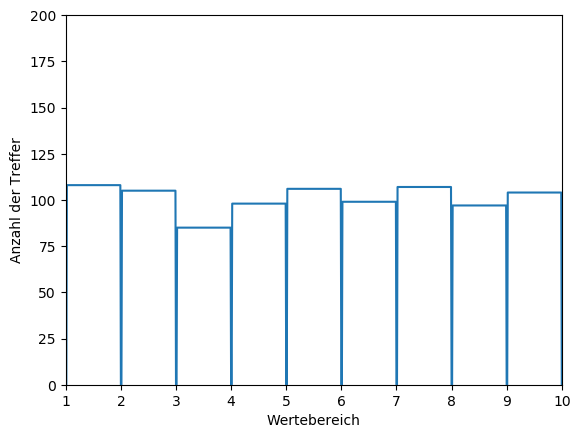

PyObject <matplotlib.text.Text object at 0x7fcd952d0710>

In [4]:
M = 10
N = 1000

plot_hist(M, N, rand_hist(M, N))

Aufgabe 3b)

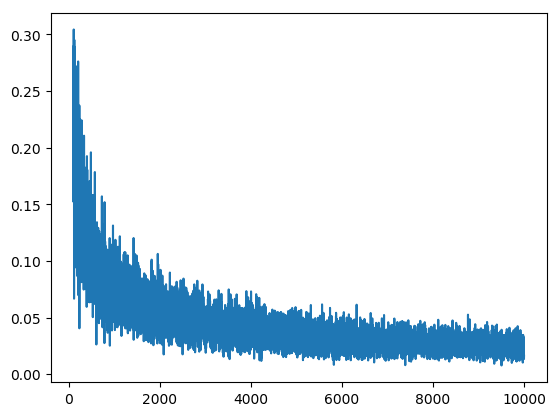

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7fcd9514c668>

In [5]:
M = 10

Ns = 100:10000

results = []

for n in Ns
    hist = rand_hist(M, n)
    delta = 0
    for i in hist
        delta += abs(i/n-1/M)
    end
    push!(results, delta)
end

plot(Ns, results)

Aufgabe 3c)

In [6]:
function lcg_fgen(s, vec)
    state = s
    function new_rand()
        state = mod(vec[1]*state+vec[2],vec[3])
        return state/vec[3]
    end
    return new_rand
end

lcg_fgen (generic function with 1 method)

In [7]:
seeds = [1, 23, 64523]
params = [[12345, 678, 124612], [94, 500, 16420], [24512, 167237, 100000000]]

for k in 1:3
    f = lcg_fgen(seeds[k], params[k])
    p = 0
    while(f()*params[k][3] != seeds[k] && p <= params[k][3])
        p += 1
    end
    if(p <= params[k][3])
        println("Für U0 = ", seeds[k], ", a = ", params[k][1], ", c = ", params[k][2], " und m = ", params[k][3], " ist die Periode p = ", p)
    else
        println("Für U0 = ", seeds[k], ", a = ", params[k][1], ", c = ", params[k][2], " und m = ", params[k][3], " gibt es keine periodizität")
    end
end

Für U0 = 1, a = 12345, c = 678 und m = 124612 ist die Periode p = 3893
Für U0 = 23, a = 94, c = 500 und m = 16420 gibt es keine periodizität
Für U0 = 64523, a = 24512, c = 167237 und m = 100000000 gibt es keine periodizität


In [8]:
function imlazy(x)
    println("Für U0 = ", seeds[x], ", a = ", params[x][1], ", c = ", params[x][2], " und m = ", params[x][3], " ist die Verteilung:")
    plot_hist(M, N, rand_hist(M, N, lcg_fgen(seeds[x], params[x])))
end

imlazy (generic function with 1 method)

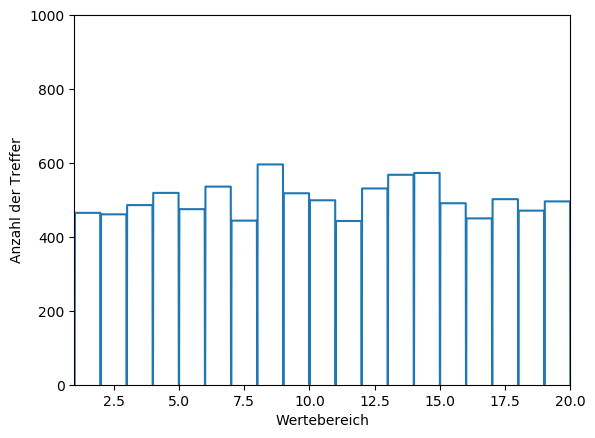

Für U0 = 1, a = 12345, c = 678 und m = 124612 ist die Verteilung:


PyObject <matplotlib.text.Text object at 0x7fcd952a12b0>

In [9]:
M = 20
N = 10000

imlazy(1)

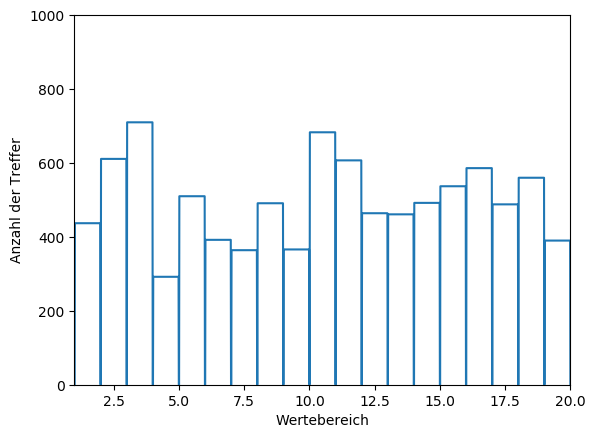

Für U0 = 23, a = 94, c = 500 und m = 16420 ist die Verteilung:


PyObject <matplotlib.text.Text object at 0x7fcd9507b518>

In [10]:
imlazy(2)

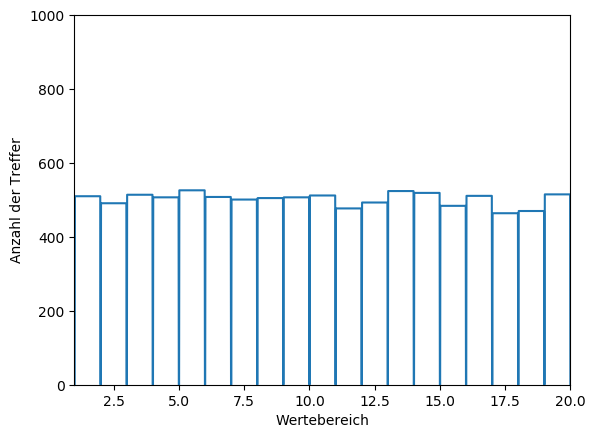

Für U0 = 64523, a = 24512, c = 167237 und m = 100000000 ist die Verteilung:


PyObject <matplotlib.text.Text object at 0x7fcd95015978>

In [11]:
imlazy(3)